In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
df_path = pd.read_csv('Data_paths.csv')

In [3]:
len(df_path)

432923

In [ ]:
df_path = df_path.groupby('moa').sample(n=5, random_state=0)

In [4]:
df_path.moa.value_counts()

Actin disruptors             3000
Aurora kinase inhibitors     3000
Cholesterol-lowering         3000
DNA damage                   3000
DNA replication              3000
Eg5 inhibitors               3000
Epithelial                   3000
Kinase inhibitors            3000
Microtubule destabilizers    3000
Microtubule stabilizers      3000
Protein degradation          3000
Protein synthesis            3000
Name: moa, dtype: int64

In [5]:
N = df_path.shape[0]
X = np.empty(shape=(N,68,68,3), dtype="int16")

In [6]:
for index, path in tqdm(enumerate(df_path['path']), total = N):
    image = np.load(path)
    X[index,:,:,:] = image
print(X.shape)

100%|██████████| 36000/36000 [03:52<00:00, 154.96it/s]

(36000, 68, 68, 3)


In [7]:
dmsomean = np.load('F:\Programming\DTU\Human MCF7\Segmented\Inspection\ClassMean\DMSO.npy')
X = X - dmsomean

In [8]:
X = X.reshape(X.shape[0], -1)
X = X/255

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3000)
pca.fit(X)

PCA(n_components=3000)

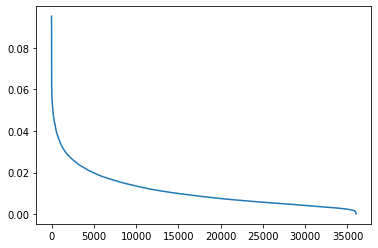

In [10]:
py = np.sort(np.diag(np.cov(X)))[::-1]
plt.plot(py)

In [11]:
# plt.plot(range(pca.singular_values_), pca.singular_values_)

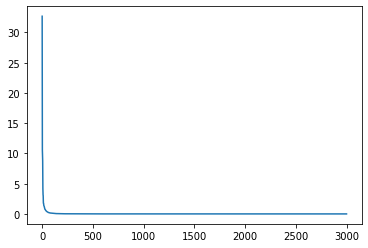

In [12]:
plt.plot(pca.explained_variance_)

155.86444910609913


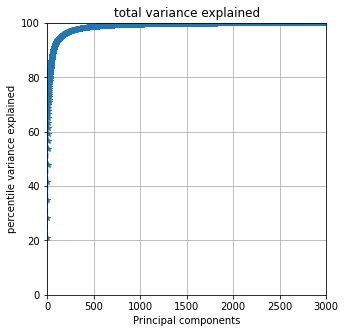

In [13]:

fig = plt.figure(figsize=(5,5))
K=3000

total_variance_explained = np.zeros(min(pca.explained_variance_.shape[0],K))
for i in range(K):
    total_variance_explained[i] = np.sum(pca.explained_variance_[:i+1])
    
print(np.sum(pca.explained_variance_))
plt.plot(range(1,K+1),100*total_variance_explained/sum(pca.explained_variance_),"--*")
plt.grid();
plt.title('total variance explained')
plt.ylim(0,100)
plt.xlim(0,K)
plt.xlabel('Principal components')
plt.ylabel('percentile variance explained')
plt.show();

155.86444910609913


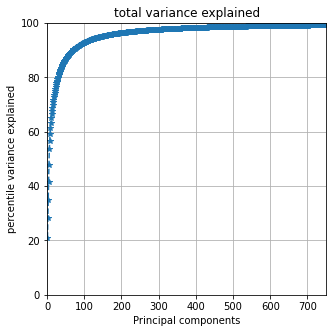

In [14]:

fig = plt.figure(figsize=(5,5))
K=750

total_variance_explained = np.zeros(min(pca.explained_variance_.shape[0],K))
for i in range(K):
    total_variance_explained[i] = np.sum(pca.explained_variance_[:i+1])
    
print(np.sum(pca.explained_variance_))
plt.plot(range(1,K+1),100*total_variance_explained/sum(pca.explained_variance_),"--*")
plt.grid();
plt.title('total variance explained')
plt.ylim(0,100)
plt.xlim(0,K)
plt.xlabel('Principal components')
plt.ylabel('percentile variance explained')
plt.show();

In [15]:
pc = np.zeros(pca.components_.shape)
for index, component in enumerate(pca.components_):
    pc[index] = (component - np.min(component))/(np.max(component)-np.min(component))


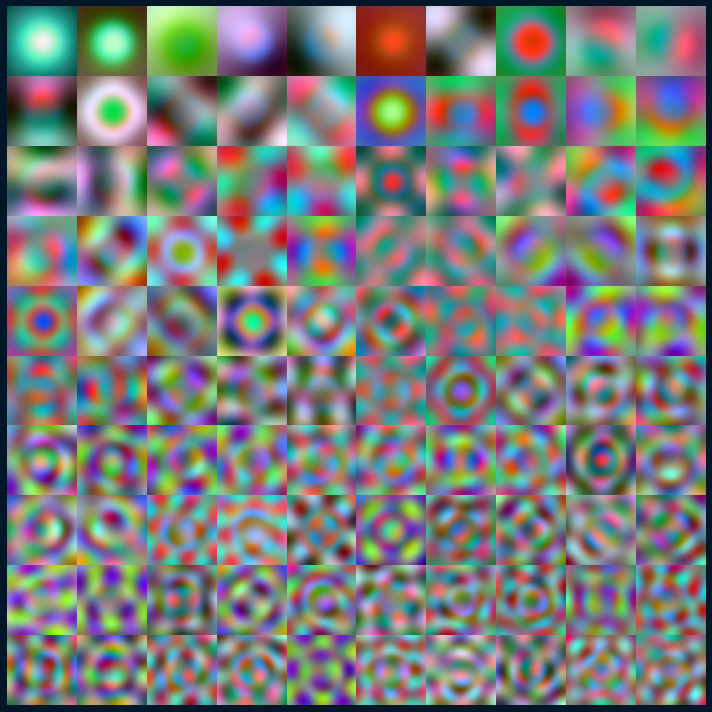

In [16]:

size = 10
# plt.figure(figsize=(size*3,size*3))
# axs = [plt.subplot(size, size, i+1) for i in range(size**2)]
# for i in range(size**2):
#     axs[i].axis('off')
#     axs[i].set_aspect('equal')
#     axs[i].imshow(pc[i].reshape(68,68,3))

fig, axs = plt.subplots(size, size, figsize=(size,size), gridspec_kw=dict(hspace=0, wspace=0), facecolor = "#011627")
for x in range(size):
    for y in range(size):
        i = x*size+y
        axs[x,y].axis('off')
        axs[x,y].set_aspect('equal')
        axs[x,y].imshow(pc[i].reshape(68,68,3))
fig.tight_layout()
plt.show()

